# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
#!kaggle datasets download -d khaledzsa/traffic-dataset
#!unzip traffic-dataset.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('Traffic Data.csv',
                 parse_dates=['date_time'],
                 index_col='date_time')
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include='object').T

In [ ]:
df.shape

In [ ]:
#df['traffic_volume'].value_counts().plot(kind = 'bar')

In [ ]:
df['traffic_volume'].shape

In [ ]:
df['weather_description'].value_counts()
# I belive that this column is useless, it doesen't add any more information about the weather and perhaps had no affecet to the dataset
# so I gana dorp it :)

In [ ]:
df.drop('weather_description', axis=1, inplace=True) # goodbay 👋🏻

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [ ]:
df.isna().sum()

In [ ]:
# since the missing data is too small and it is only in the 'traffic_volume' column (the target) I preffer to drop the null rows;
# try to not affecting the result of my models
df = df.dropna()
df.isna().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

In [ ]:
# I've notice that the data is not sorted, so we need to sort the data before any EDA step
df = df.sort_values(by='date_time')
df

In [ ]:
df_daily = df.resample('D').agg({
  'traffic_volume': 'mean',
  'temp': 'mean',
  'rain_1h': 'mean',
  'snow_1h': 'mean',
  'clouds_all': 'mean',
  'weather_main': lambda x: x.mode()[0],
})

In [ ]:
df_daily

In [ ]:
lags = []
for i in range(1, 6):
    df_daily[f'Lag_{i}'] = df_daily['traffic_volume'].shift(i)
    lags.append(f'Lag_{i}')

df_daily.dropna(inplace=True)
df_daily

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [ ]:
# the first point I've already did it in the (Data Preprocessing) section and named the new featuers as lag_1 ... lag_5
# which represent the five prev_traffic_volume

In [ ]:
df_daily['traffic_volume_diff'] = df_daily['traffic_volume'].diff()
df_daily.dropna(inplace=True)
df_daily

In [ ]:
df_monthly = df.resample('M').agg({
  'traffic_volume': 'mean',
  'temp': 'mean',
  'rain_1h': 'mean',
  'snow_1h': 'mean',
  'clouds_all': 'mean',
  'weather_main': lambda x: x.mode()[0],
})

df_yearly = df.resample('Y').agg({
  'traffic_volume': 'mean',
  'temp': 'mean',
  'rain_1h': 'mean',
  'snow_1h': 'mean',
  'clouds_all': 'mean',
  'weather_main': lambda x: x.mode()[0],
})

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [ ]:
# ploting the time series data for the Daily dataset
plt.figure(figsize=(20,10))
plt.plot(df_daily.index, df_daily['traffic_volume'])
plt.title('Traffic Volume Over Daily Time distribution')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Traffic Volume')
plt.show()

In [ ]:
decomposition = seasonal_decompose(df_daily['traffic_volume'], model='additive')
decomposition.plot()
plt.title('Daily plot for Seasonal Decomposition')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# ploting the time series data for the monthly dataset
plt.figure(figsize=(15,10))
plt.plot(df_monthly.index, df_monthly['traffic_volume'])
plt.title('Traffic Volume Over Monthly Time distribution')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Traffic Volume')
plt.show()

In [ ]:
decomposition = seasonal_decompose(df_daily['traffic_volume'], model='additive')
decomposition.plot()
plt.title('Monthly plot for Seasonal Decomposition')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# ploting the time series data for the Yearly dataset
plt.figure(figsize=(15,10))
plt.plot(df_yearly.index, df_yearly['traffic_volume'])
plt.title('Traffic Volume Over Yearly Time distribution')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Traffic Volume')
plt.show()

In [ ]:
decomposition = seasonal_decompose(df_daily['traffic_volume'], model='additive')
decomposition.plot()
plt.title('Yearly plot for Seasonal Decomposition')
plt.xticks(rotation=45)
plt.show()

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [ ]:
X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

# Identify numerical and categorical features
numerical_features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
categorical_features = ['weather_main']

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [ ]:
# the first model that I will select is SimpelRNN
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

num_examples = X.shape[0]    # B: batch dimension (not needed in shape)
sequence_length = X.shape[1] # S: sequence dimension

model1 = keras.models.Sequential([
    layers.Input(shape=(sequence_length, 1)),
    layers.SimpleRNN(50, return_sequences=True, recurrent_dropout=0.15),
    layers.SimpleRNN(100, return_sequences=True, recurrent_dropout=0.15),
    layers.Dropout(0.2),
    layers.SimpleRNN(150),
    layers.Dense(1),
    ])

model1.summary()

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [ ]:
model1.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)

In [ ]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience=50,
    restore_best_weights=True,
)

# checkpoint
checkpoint = callbacks.ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
)

In [35]:
history1 = model1.fit(X_train, y_train,
           epochs=300,
           batch_size=128,
           validation_split=0.2,
           shuffle=False,
           callbacks=[early_stopping])

Epoch 1/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - loss: 13607097.0000 - mae: 3137.2842 - val_loss: 14363038.0000 - val_mae: 3200.9880
Epoch 2/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 13483865.0000 - mae: 3117.2625 - val_loss: 14263499.0000 - val_mae: 3185.4004
Epoch 3/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13387614.0000 - mae: 3101.7798 - val_loss: 14166469.0000 - val_mae: 3170.1340
Epoch 4/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13293400.0000 - mae: 3086.5542 - val_loss: 14070796.0000 - val_mae: 3155.0088
Epoch 5/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13200424.0000 - mae: 3071.4536 - val_loss: 13976146.0000 - val_mae: 3139.9731
Epoch 6/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13108401.0000 - mae: 3056.4360 - val_loss: 13882362.0000 - val_mae: 3125.0037
Epoch 7/300
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13017211.0000 - mae: 3041.4802 - val_loss: 13789360.0000 - val_mae: 3110.0874
Epoch 8/300
100/100 ━━━━

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [36]:
y_pred1 = model1.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [37]:
his1 = pd.DataFrame(history1.history)

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)

print("Model 1 Evaluation:")
print("MAE:", mae1)
print("MSE:", mse1)
print("RMSE:", rmse1)

Model 1 Evaluation:
MAE: 1705.1092423215237
MSE: 3804512.2271394623
RMSE: 1950.515887435799


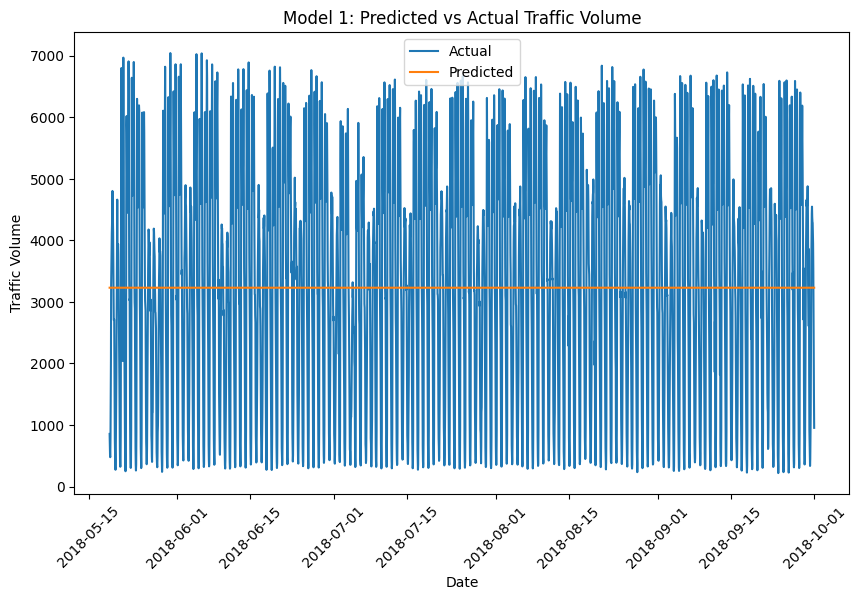

In [39]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred1, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Model 1: Predicted vs Actual Traffic Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()

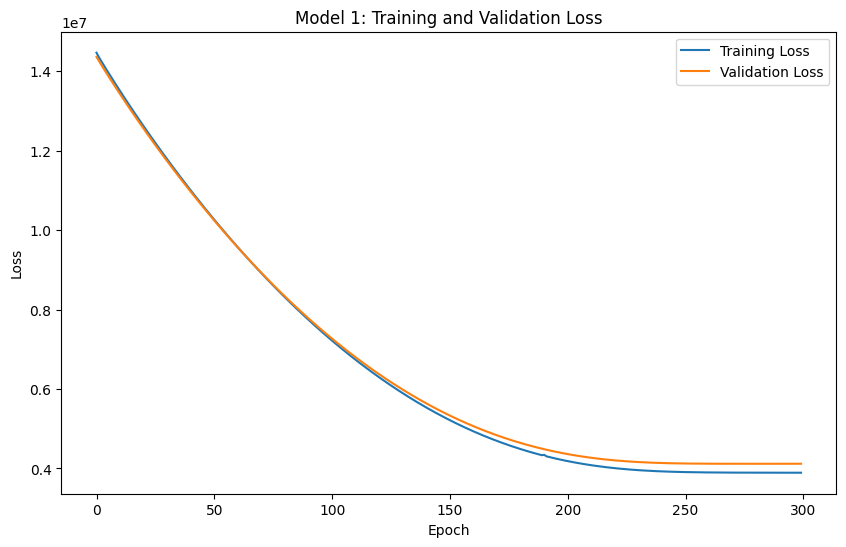

In [40]:
# Plot loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(his1.index, his1['loss'], label='Training Loss')
plt.plot(his1.index, his1['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 1: Training and Validation Loss')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [41]:
#!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

model2 = auto_arima(y_train, start_p = 1, start_q = 1,
                    max_p = 5, max_q = 5, m = 12,
                    start_P = 1, seasonal = True,
                    d = None, D = None, trace = True,
                    stepwise = True, suppress_warnings = True)


model2.fit(y_train)
model2.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=253195.232, Time=50.83 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=287823.733, Time=0.36 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=256084.812, Time=19.34 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=270367.397, Time=24.27 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=308746.987, Time=0.19 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=253760.214, Time=23.02 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=253482.869, Time=42.34 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=252763.300, Time=80.11 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=252769.898, Time=67.34 sec
 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=252696.180, Time=101.00 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=252958.346, Time=78.47 sec


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
y_pred2 = stepwise_fit.predict(X_test,typ='levels').rename('Predictions')

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:

mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse1)

print("Model 2 Evaluation:")
print("MAE:", mae2)
print("MSE:", mse2)
print("RMSE:", rmse2)

In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred2, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Model 2: Predicted vs Actual Traffic Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
# Plot loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(his1.index, his1['loss'], label='Training Loss')
plt.plot(his1.index, his1['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model 1: Training and Validation Loss')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:



1. **Data Preprocessing**: In the provided code, the data preprocessing steps involved handling missing values and feature scaling. Missing values in the 'traffic_volume' column were addressed by removing the corresponding rows, as their number was insignificant and this approach minimized potential bias compared to imputation. Feature scaling was performed using MinMaxScaler on numerical features ('temp', 'rain_1h', 'snow_1h', 'clouds_all') to normalize their ranges. This step ensures that all features contribute equally to model training and prevents features with larger scales from dominating the learning process, ultimately improving model performance and convergence speed. Additionally, the 'weather_main' feature was one-hot encoded to handle its categorical nature, allowing the model to effectively utilize this information.

2. **Feature Engineering**: Yes, Feature engineering included creating lag features (Lag_1 to Lag_5) to capture past traffic volume patterns and a 'traffic_volume_diff' feature to highlight short-term fluctuations. These additions aim to provide the model with a richer understanding of temporal dependencies and variations for improved predictive accuracy.

3. **Model Architecture**: The code employs a Simple Recurrent Neural Network (SimpleRNN) due to its suitability for time series data. The architecture includes three SimpleRNN layers (50, 100, and 150 neurons) to capture temporal dependencies, with dropout layers to prevent overfitting. The final Dense layer provides the traffic volume prediction. This model was selected for its ability to effectively handle time series data and its relative simplicity compared to more complex alternatives like LSTM or GRU.

4. **Training Process**: The code uses a batch size of 128, a common starting point for neural networks, and allows up to 300 epochs for training, utilizing early stopping to prevent overfitting. The 'adam' optimizer is employed for its adaptive learning rate and generally good performance. While the code doesn't show explicit experimentation with different values, exploring various batch sizes, learning rates, and other optimizers is recommended for optimal performance.

5. **Loss Function and Metrics**: MSE is used as the loss function to penalize larger errors and MAE, MSE, and RMSE are calculated for evaluation. These metrics provide a comprehensive understanding of the model's accuracy and error distribution, aligning with the goal of accurate traffic volume forecasting

6. **Model Tuning (If Done)**: Early stopping is implemented to prevent overfitting by monitoring validation loss and halting training when it stops improving. This helps the model generalize better to unseen data and potentially improves its predictive performance on the test set.

7. **Overfitting and Underfitting**: While the code doesn't explicitly analyze overfitting or underfitting, the inclusion of dropout layers and early stopping suggests a focus on preventing overfitting. nevertheless, it seems that Model 1 is completely underfitted,
**About Model 2: Unfortunately I could not see the precution due a crash in the RAM**

8. **Future Improvements**: No suggestions
